<a href="https://colab.research.google.com/github/kcanmersin/Google-Colab-Notebooks/blob/main/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [129]:
data = pd.read_csv("diamonds.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)

In [130]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [132]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [133]:
#x y and z cannot be equal to zero
data = data[(data['x'] != 0) & (data['y'] != 0) & (data['z'] != 0)]

In [134]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [135]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

In [136]:
cat_cols = []
num_cols = []

for column_name in data.columns:
    unique_values = data[column_name].unique()
    num_unique_values = data[column_name].nunique()

    if num_unique_values < 10:
        print(f"Unique values in ({num_unique_values})'{column_name}': {unique_values}")
        cat_cols.append(column_name)
    else:
        num_cols.append(column_name)

print("Categorical columns:", cat_cols)
num_cols.remove("price")
print("Numerical columns:", num_cols)


Unique values in (5)'cut': ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in (7)'color': ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in (8)'clarity': ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Categorical columns: ['cut', 'color', 'clarity']
Numerical columns: ['carat', 'depth', 'table', 'x', 'y', 'z']


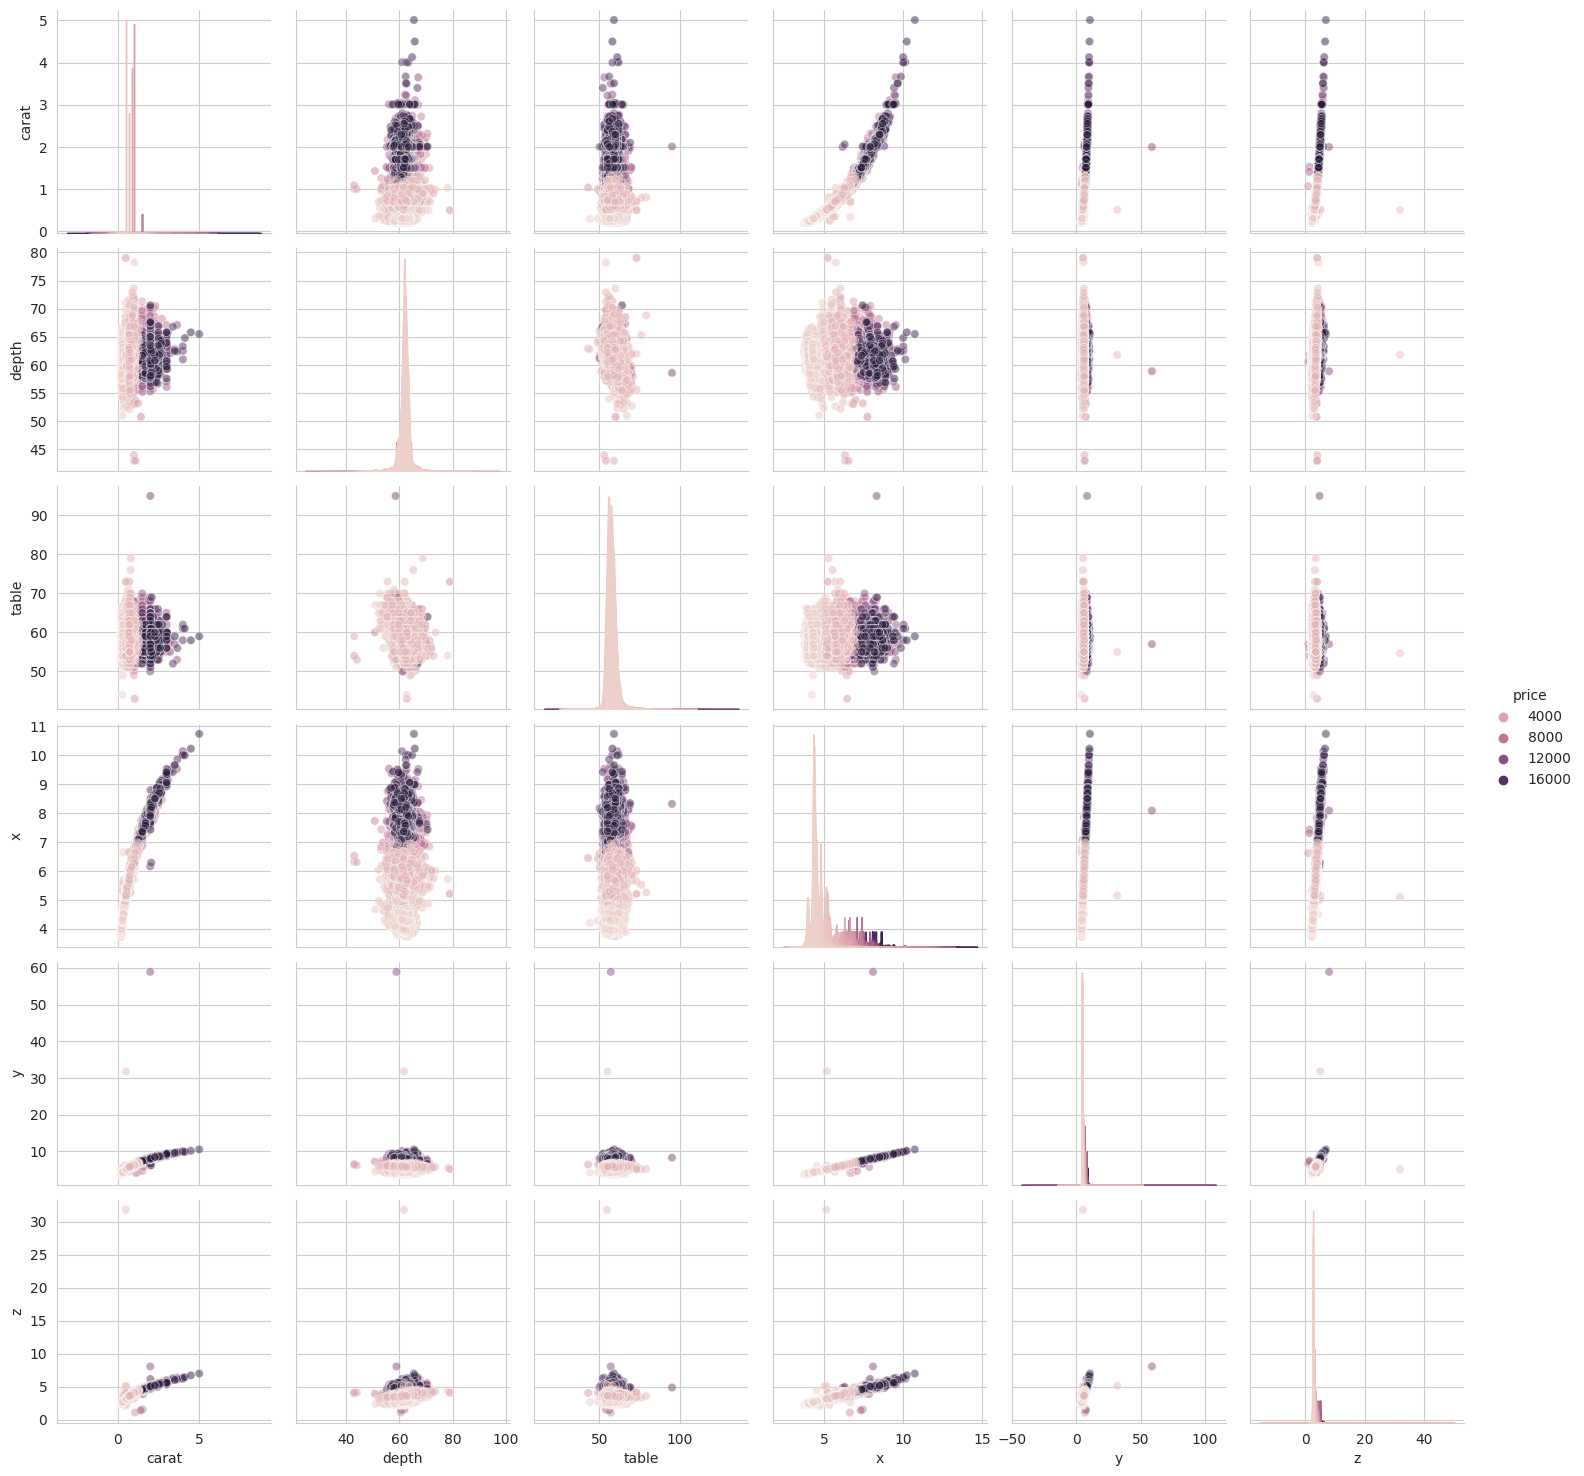

In [137]:
sns.pairplot(data, hue="price", plot_kws={"alpha": 0.5})
plt.show()

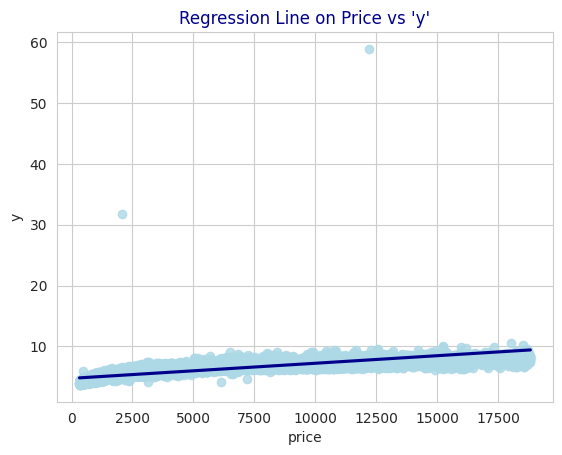

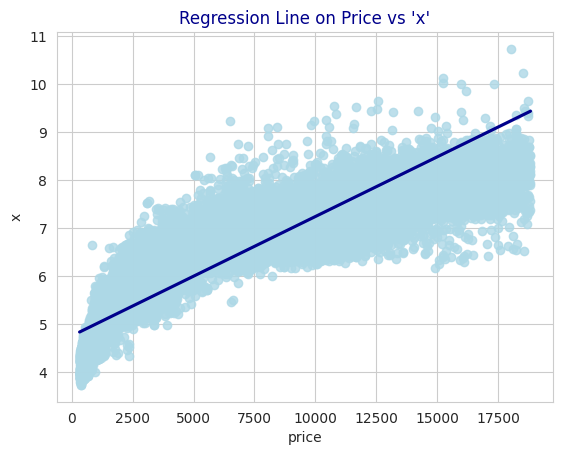

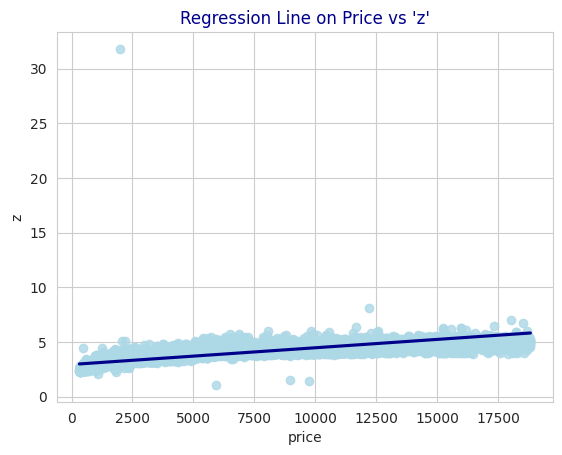

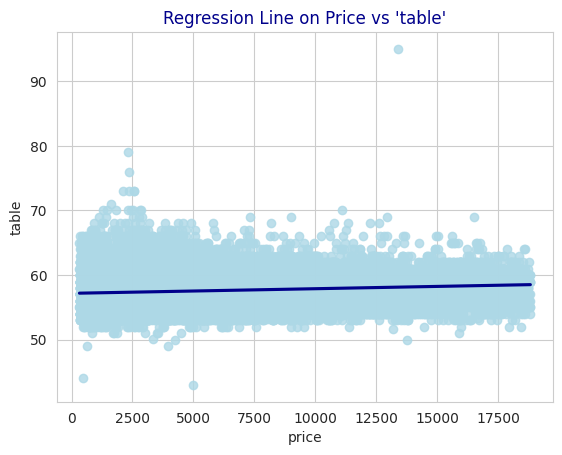

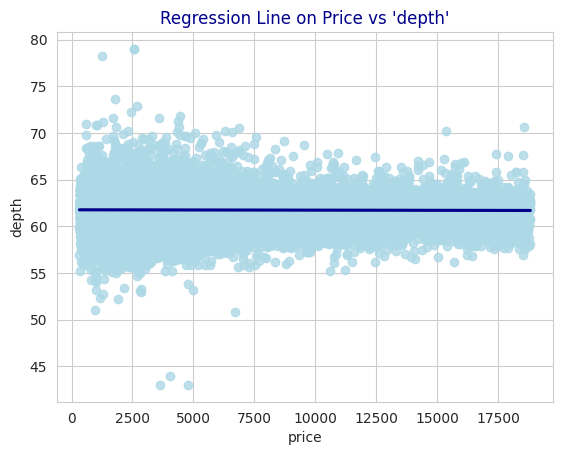

In [138]:

ax1 = sns.regplot(
    x="price", y="y", data=data, fit_reg=True,
    scatter_kws={"color": "lightblue"}, line_kws={"color": "darkblue"}
)
ax1.set_title("Regression Line on Price vs 'y'", color="darkblue")
plt.show()

ax2 = sns.regplot(
    x="price", y="x", data=data, fit_reg=True,
    scatter_kws={"color": "lightblue"}, line_kws={"color": "darkblue"}
)
ax2.set_title("Regression Line on Price vs 'x'", color="darkblue")
plt.show()

ax3 = sns.regplot(
    x="price", y="z", data=data, fit_reg=True,
    scatter_kws={"color": "lightblue"}, line_kws={"color": "darkblue"}
)
ax3.set_title("Regression Line on Price vs 'z'", color="darkblue")
plt.show()
ax4 = sns.regplot(
    x="price", y="table", data=data, fit_reg=True,
    scatter_kws={"color": "lightblue"}, line_kws={"color": "darkblue"}
)
ax4.set_title("Regression Line on Price vs 'table'", color="darkblue")
plt.show()
ax5 = sns.regplot(
    x="price", y="depth", data=data, fit_reg=True,
    scatter_kws={"color": "lightblue"}, line_kws={"color": "darkblue"}
)
ax5.set_title("Regression Line on Price vs 'depth'", color="darkblue")
plt.show()

In [139]:
data = data[ ( data["depth"] < 75 ) & ( data["depth"] > 45) ]
data = data[ ( data["table"] < 80 ) & ( data["table"] > 40) ]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

<Figure size 1200x800 with 0 Axes>

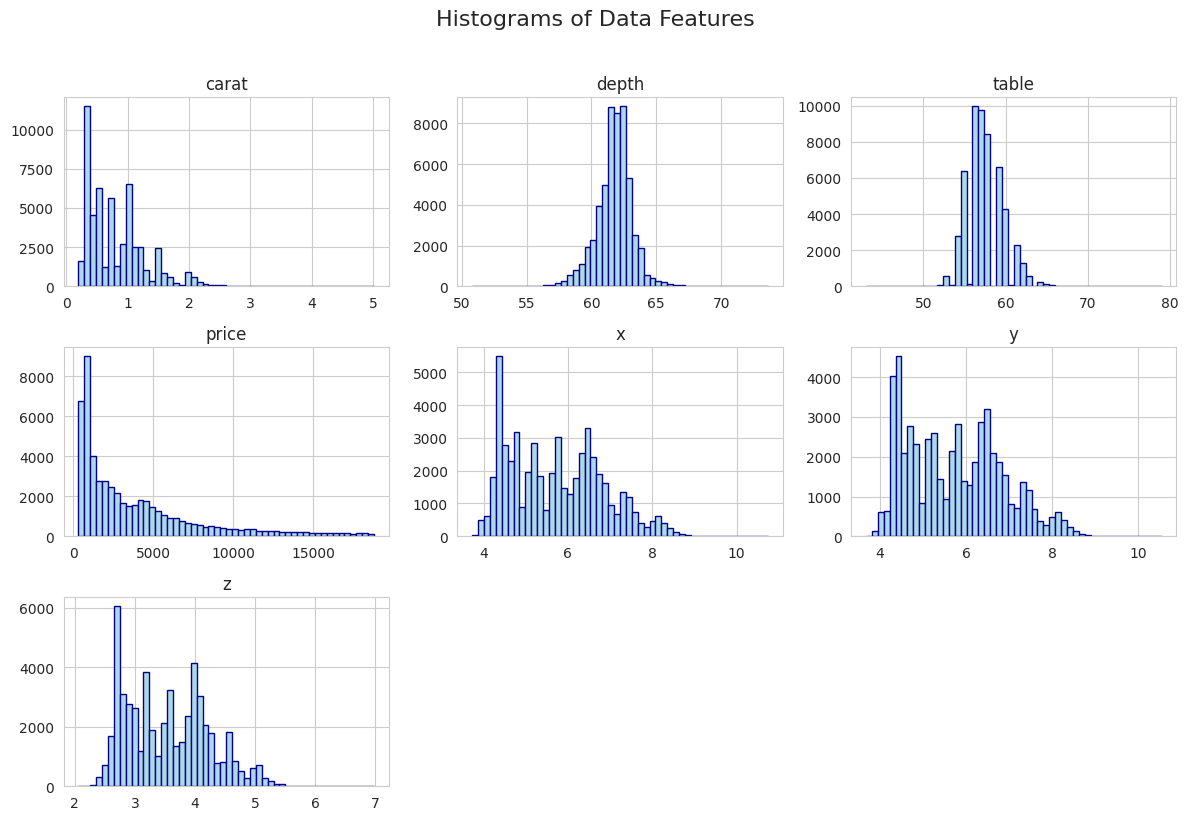

In [140]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
data.hist(bins=50, figsize=(12, 8), color="lightblue", edgecolor="darkblue")

plt.suptitle("Histograms of Data Features", y=1.02, fontsize=16)
plt.xlabel("Feature Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()

plt.show()

<ipython-input-141-72eeb6a9dd19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


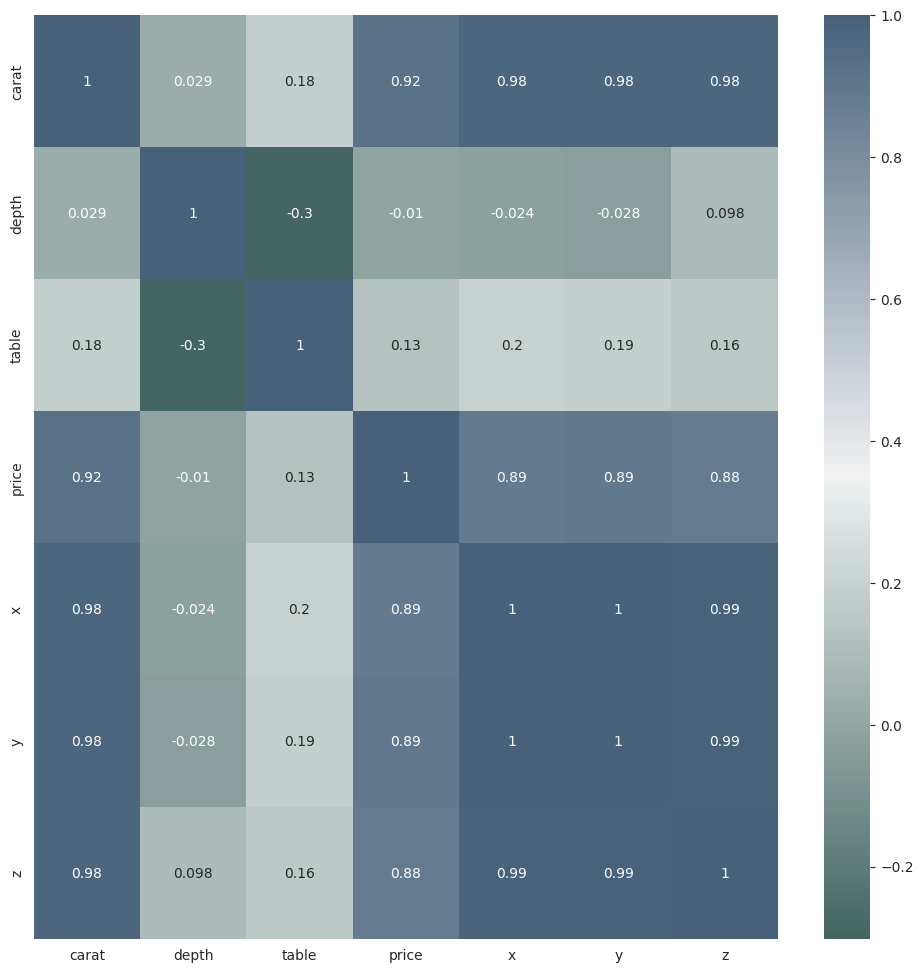

In [141]:
cmap = sns.diverging_palette(180, 240, s=50, l=40, n=6, as_cmap=True)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, cmap=cmap, annot=True)
plt.show()

In [142]:
import pandas as pd
import numpy as np

def find_columns_for_log_transform(data, threshold=0.75):
    log_cols = []

    for column_name in data.columns:
        if data[column_name].dtype in [np.float64, np.float32  ] and (data[column_name] > 0).all():
            skewness = data[column_name].skew()
            if abs(skewness) > threshold:
                log_cols.append(column_name)

        print(f"Skewness of '{column_name}': {skewness}")

    return log_cols

log_cols = find_columns_for_log_transform(data)
print("Columns for Log Transform:", log_cols)


Skewness of 'carat': 1.1164179177981226
Skewness of 'cut': 1.1164179177981226
Skewness of 'color': 1.1164179177981226
Skewness of 'clarity': 1.1164179177981226
Skewness of 'depth': -0.057711663500449754
Skewness of 'table': 0.7055178338857653
Skewness of 'price': 0.7055178338857653
Skewness of 'x': 0.398392688321442
Skewness of 'y': 0.39283253796265105
Skewness of 'z': 0.39570427027289506
Columns for Log Transform: ['carat']


In [143]:
print(log_cols)
print(cat_cols)
print(num_cols)


['carat']
['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z']


In [144]:
cat_pipeline = make_pipeline(
    OneHotEncoder())


log_pipeline = make_pipeline(
    FunctionTransformer(np.log),
    StandardScaler())

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("log", log_pipeline, log_cols),
    ("cat", cat_pipeline, cat_cols),
    ("num", num_pipeline, num_cols)
])

In [145]:
X = data.drop(["price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed=preprocessing.transform(X_test)

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    XGBRegressor()
]

pipelines = []
for model in models:
    pipe = Pipeline([
        ("model", model)
    ])
    pipelines.append(pipe)

for idx, pipe in enumerate(pipelines):
    pipe.fit(X_train_preprocessed, y_train)
    print(f"Model {idx+1} eğitildi: {type(pipe.named_steps['model'])}")

Model 1 eğitildi: <class 'sklearn.linear_model._base.LinearRegression'>
Model 2 eğitildi: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Model 3 eğitildi: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Model 4 eğitildi: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
Model 5 eğitildi: <class 'xgboost.sklearn.XGBRegressor'>


In [147]:
from sklearn.model_selection import cross_val_score

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_preprocessed, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


LinearRegression: -1112.457290 
DecisionTree: -748.374880 
RandomForest: -548.321806 
KNeighbors: -775.400088 
XGBRegressor: -556.002176 


In [148]:
for idx, pipe in enumerate(pipelines):
    pred = pipe.predict(X_test_preprocessed)

    print(f"Results for {pipe_dict[idx]} model:")
    print("R^2:", metrics.r2_score(y_test, pred))
    adj_r2 = 1 - (1 - metrics.r2_score(y_test, pred)) * (len(y_test) - 1) / (len(y_test) - X_test_preprocessed.shape[1] - 1)
    print("Adjusted R^2:", adj_r2)
    print("MAE:", metrics.mean_absolute_error(y_test, pred))
    print("MSE:", metrics.mean_squared_error(y_test, pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print("\n")

Results for LinearRegression model:
R^2: 0.9250079182327029
Adjusted R^2: 0.9248573653136964
MAE: 714.8503957210831
MSE: 1176462.599934984
RMSE: 1084.6486066625375


Results for DecisionTree model:
R^2: 0.9656636401892058
Adjusted R^2: 0.9655947070555236
MAE: 354.2822215626623
MSE: 538662.7785671885
RMSE: 733.9364949143683


Results for RandomForest model:
R^2: 0.9805083143426637
Adjusted R^2: 0.9804691831423702
MAE: 272.74058486445455
MSE: 305782.13919573143
RMSE: 552.9757130252028


Results for KNeighbors model:
R^2: 0.9642260046480531
Adjusted R^2: 0.9641541853399631
MAE: 387.00145432959863
MSE: 561216.1522920532
RMSE: 749.1436125951107


Results for XGBRegressor model:
R^2: 0.9804693256454025
Adjusted R^2: 0.980430116172016
MAE: 284.29953737167625
MSE: 306393.7870266375
RMSE: 553.5284879991611


